# Machine Learning
## Assignment 1
### Morgan Reilly -- 20235398

## References:
* https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#tutorial-setup
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
* https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

_Research what open-source machine learning packages are available, and select one that you think will be appropriate for this task. Your report should include a brief justification for your choice and an overview of the main features of the package you have chosen. `[4 marks max.]`_

* TODO: Review and possibly re-write this...
<br><br>
* Upon analysis of this I found that there are many available open-source machine learning packages available for this task. These consist of the likes of TensorFlow, Keras, Scikit-learn and Theano. Through past expeirience and projects I have used TensorFlow and Keras, and for this project I had initially opted to use Keras as it is relatively user-friendly and I thought should work well for a classification task such as this. Upon reviewing this in a Q&A session for this module I found out that this task was better suited to SciKit-Learn or WEKA.
* The main features of this application, outside of the necessary imports such as pandas or numpy, consist of the likes of the Tree library, which allow me to use the various Tree models for the Classification task at hand. I have also included various other packages such as model_selection, this is used for cross-validation, metrics which is used to generate a confusion matrix, and the ensemble library, which allows me to implement a Radom Forest Classifier.

_A dataset is supplied below. You will probably need to do some work to prepare it for input into the ML package, depending on the package’s requirements. Document any data preparation steps in your report. `[2 marks max.]`_

* See work below for basic outline, will need to be fluffed out more but the gist is quite obvious

_In the ML package, select two different classification algorithms that you will apply to the dataset to learn two different classification models. One of these should be one that we have already covered in lectures (ID3/C4.5 or kNN) while the other should be completely different from those we have already covered. In your report, include a clear description of both algorithms. Ensure that you acknowledge all of your sources of information. `[3x2 = 6 marks max.]`_

* TODO: 
    * Get CART algorithm up to a decent accuracy
    * Get Random Forest up to a decent accuracy
    * If above feasible
        * Implement kNN for examination purposes
    * Write about 2 used

_In the ML package, train each of your chosen algorithms using the training set provided in beer_training.txt. You should then test your trained models using the test set provided in beer_test.txt. Report on the results, including the classification accuracy for each model on the training set and on the test set. Also include details of the classification models constructed – these may include graphics if appropriate. `[3x2 = 6 marks max.]`_

* TODO:
    * Once accuracy is at a high point, or at least a decent point begin this section
    * Can include the Tree grapic if using a decision tree
    * Try plot some output if using Random Forest

_Discuss in your report whether the two models give very similar or significantly different results, and why. `[2 marks max.]`_

* TODO: This will be done last, worry about above first...

## Imports

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import csv

from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Text Processing

* Create csv file from text file
* Read in text file and transpose to csv
* Do this for both test and train data

#### CSV Generation

In [2]:
"""
Read CSV
    Load csv from disk, pass in output location
    Convert to CSV and return
"""
def read_csv(file_in, file_out):
    data = pd.read_csv(file_in, sep="\t", header=None)
    data.columns = ['calorific_value', 'nitrogen', 'turbidity',
                        'style', 'alcohol', 'sugars', 'bitterness',
                        'beer_id', 'colour', 'degree_of_fermentation']
    data.to_csv(file_out, index = None)
    data = pd.read_csv(file_out)
    return data

#### Training Data

In [3]:
# Read in and store training data as datafram
training_data = read_csv("data/beer_training.txt", "data/beer_training.csv")
training_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,41.638096,0.322277,1.858922,3.998486,17.365645,8.935387,90.032258,11.321226,67.143733
std,2.623812,0.135035,0.891977,0.250500,1.113639,3.419934,50.833370,2.842828,5.862946
min,37.075221,0.107013,0.290909,3.393846,15.740000,2.730211,1.000000,5.760000,53.668571
25%,38.966814,0.215891,1.192727,3.801538,16.560000,6.140829,44.500000,9.000000,63.336071
50%,41.809735,0.290150,1.720000,4.015385,16.900000,9.436842,94.500000,11.520000,66.663571
75%,44.022124,0.405223,2.373409,4.219231,18.150000,11.476408,133.500000,13.230000,70.733929
max,45.836283,0.742774,4.255455,4.427692,20.650000,20.063789,177.000000,20.520000,87.238571


#### Test Data

In [4]:
# Read in and store test data as data-frame
test_data = read_csv("data/beer_test.txt", "data/beer_test.csv")
test_data.describe()

,calorific_value,nitrogen,turbidity,alcohol,sugars,bitterness,beer_id,colour,degree_of_fermentation
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,41.722714,0.315067,1.993182,4.037641,17.213000,8.463911,91.733333,11.408000,61.087095
std,2.616999,0.106278,1.063155,0.246711,1.140551,3.035596,51.831247,2.599807,11.134063
min,37.296460,0.156837,0.689091,3.526154,15.900000,2.924895,4.000000,6.840000,37.034286
25%,39.973451,0.237648,1.345227,3.879231,16.647500,6.341276,54.500000,9.390000,53.237143
50%,41.522124,0.271882,1.771818,4.033846,16.730000,7.855421,87.000000,11.760000,59.157143
75%,43.977876,0.395544,2.252500,4.173846,17.752500,10.727566,131.750000,13.350000,73.330000
max,45.880531,0.525512,5.217273,4.563077,20.510000,13.456368,178.000000,15.360000,79.134286


In [5]:
training_data.count()

calorific_value           124
nitrogen                  124
turbidity                 124
style                     124
alcohol                   124
sugars                    124
bitterness                124
beer_id                   124
colour                    124
degree_of_fermentation    124
dtype: int64

In [6]:
test_data.count()

calorific_value           30
nitrogen                  30
turbidity                 30
style                     30
alcohol                   30
sugars                    30
bitterness                30
beer_id                   30
colour                    30
degree_of_fermentation    30
dtype: int64

## Classification

In [7]:
"""
Generate Samples
    Takes a pandas data frame
    Strips the labels
    Returns list
"""
def gen_samples(df):
    n_samples = []
    for col, row in df.iterrows():
        rows = [row[0], row[1], row[2], row[4], row[5], 
            row[6], row[7], row[8], row[9]]
        n_samples.append(rows)
    return n_samples

"""
Feature Generation
    Takes pandas data frame
    Isolates clasifing label (in this case: style)
    returns list
"""
def gen_features(df):
    n_features = []
    for col in df['style']:
        n_features.append(col)
    return n_features

### Generate features set and sample set of:
    * Training Data
    * Test Data

In [8]:
# Training Data
n_train_samples = gen_samples(training_data)
n_train_features = gen_features(training_data)

# Test Data
n_test_samples = gen_samples(test_data)
n_test_features = gen_features(test_data)

In [9]:
# Training Set
X_train = n_train_samples
y_train = n_train_features

# Testing Set
X_test = n_test_samples
y_test = n_test_features

### Testing CrossValidation
Tidy this up if it works, leave below code (Model) untouched as to keep results same...

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm


X = n_train_samples
y = n_train_features
print(len(X), len(y))

124 124


In [11]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

## Model
### Training & Testing
### Type: Decision Tree Classifier

* Here I fit the model to a decision tree classifier
* I train the model on the training data, predicit the output and then evaluate the score

TODO: Desscribe the CART algorithm in some detail here to bulk up the report and explain why it's used rather than the CR3.? algorithm

In [12]:
# Fit model to training data
dtc_model = tree.DecisionTreeClassifier()
dtc_model = dtc_model.fit(X_train, y_train)

In [13]:
# Generate prediction score from training data 
train_predictions = dtc_model.predict(X_train)
print(train_predictions)

['ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale'
 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale'
 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale'
 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout']


In [14]:
# Generate the accuracy using cross-validation for 5 folds
train_score = cross_val_score(dtc_model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (train_score.mean(), train_score.std() * 2))

Accuracy: 0.90 (+/- 0.19)


In [15]:
# Generate prediction score from testing data
test_predictions = model.predict(X_test)
print(test_predictions)

['ale' 'ale' 'ale' 'ale' 'ale' 'lager' 'ale' 'ale' 'ale' 'ale' 'lager'
 'lager' 'lager' 'lager' 'lager' 'stout' 'lager' 'lager' 'ale' 'lager'
 'stout' 'lager' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout']


In [16]:
# Generate the accuracy using cross-validation for 5 folds
test_score = cross_val_score(model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (test_score.mean(), test_score.std() * 2))

Accuracy: 0.90 (+/- 0.16)


[Text(181.35000000000002, 199.32, 'X[1] <= 0.36\ngini = 0.665\nsamples = 124\nvalue = [42, 44, 38]'),
 Text(111.60000000000001, 163.07999999999998, 'X[7] <= 9.42\ngini = 0.552\nsamples = 84\nvalue = [5, 42, 37]'),
 Text(55.800000000000004, 126.83999999999999, 'X[5] <= 9.667\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(27.900000000000002, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(83.7, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(167.4, 126.83999999999999, 'X[3] <= 3.934\ngini = 0.34\nsamples = 50\nvalue = [5, 40, 5]'),
 Text(139.5, 90.6, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(195.3, 90.6, 'X[5] <= 8.714\ngini = 0.651\nsamples = 13\nvalue = [5, 3, 5]'),
 Text(139.5, 54.359999999999985, 'X[6] <= 92.0\ngini = 0.408\nsamples = 7\nvalue = [0, 2, 5]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(251

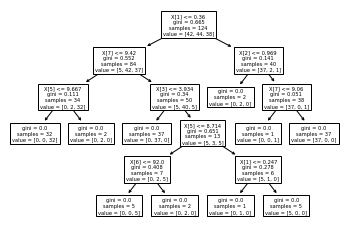

In [17]:
tree.plot_tree(dtc_model)

## Model
### Training & Testing
### Type: Decision Tree Classifier

* Here I fit the model to a Random Forest Classifier
* This is done in a similar method to the Decision Tree Classifier as shown above

In [18]:
rfc_model = RandomForestClassifier(n_estimators=10)
rfc_model = rfc_model.fit(X_train, y_train)

In [19]:
# Generate prediction score from training data 
rfc_train_predictions = rfc_model.predict(X_train)
print(train_predictions)

['ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale'
 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale'
 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'ale'
 'ale' 'ale' 'ale' 'ale' 'ale' 'ale' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager' 'lager'
 'lager' 'lager' 'lager' 'lager' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout' 'stout' 'stout' 'stout' 'stout' 'stout']


In [20]:
# Generate the accuracy using cross-validation for 5 folds
scores = cross_val_score(rfc_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.13)


In [21]:
# Generate prediction score from testing data
rfc_test_predictions = rfc_model.predict(X_test)
print(test_predictions)

['ale' 'ale' 'ale' 'ale' 'ale' 'lager' 'ale' 'ale' 'ale' 'ale' 'lager'
 'lager' 'lager' 'lager' 'lager' 'stout' 'lager' 'lager' 'ale' 'lager'
 'stout' 'lager' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout' 'stout'
 'stout']


In [22]:
# Generate the accuracy using cross-validation for 5 folds
scores = cross_val_score(rfc_model, X_test, y_test, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.97 (+/- 0.13)
